# Rotated MNIST Experiment

In [8]:
from matplotlib import pyplot as plt

import torch

In [3]:
results = torch.load("results/rotate_mnist_haukka_results.pt")
metadata = results["metadata"]
compiled_results = results["results"]

param_factors = metadata["param_factors"]
model_names = metadata["model_names"]
num_runs = metadata["num_runs"]

/tmp/ipykernel_2655925/150972889.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load("results/rotate_mnist_haukka_results.pt")


In [4]:
# Compile statistics into desired data structure
statistics_by_model = {}
for model_name in model_names:
    mean_accuracies = []
    std_accuracies = []
    flops = []
    num_params = []
    for param_factor in param_factors:
        accuracies = []
        for run_num in range(num_runs):
            stats = compiled_results[model_name][param_factor][run_num]
            accuracies.append(stats["accuracy"])
            if run_num == 0:
                flops.append(stats["flops"])
                num_params.append(stats["num_params"])
        mean_accuracy = torch.Tensor(accuracies).mean()
        std_accuracy = torch.Tensor(accuracies).std()
        mean_accuracies.append(mean_accuracy)
        std_accuracies.append(std_accuracy)
    statistics_by_model[model_name] = {
        "mean_accuracies": mean_accuracies,
        "std_accuracies": std_accuracies,
        "flops": flops,
        "num_params": num_params,
    }        

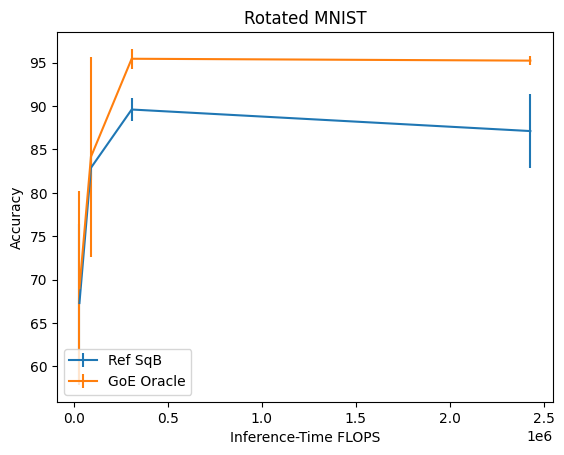

In [10]:
# Graph
model_name_to_lablel = {
    'ref_sqA': 'Ref SqA',
    'ref_sqB': 'Ref SqB',
    'goe_oracle': 'GoE Oracle',
    'goe_random': 'GoE Random',
    'goe_latent': 'GoE Latent'
}
# dont_plot = ['ref_sqA']
dont_plot = []

for model_name, statistics in statistics_by_model.items():
    if model_name in dont_plot:
        continue
    mean_accuracies = statistics['mean_accuracies']
    std_accuracies = statistics['std_accuracies']
    flops = statistics['flops']
    num_params = statistics['num_params']
    plt.errorbar(flops, mean_accuracies, yerr=std_accuracies, label=model_name_to_lablel[model_name])
plt.xlabel('Inference-Time FLOPS')
plt.ylabel('Accuracy')
plt.title('Rotated MNIST')
plt.legend()
plt.savefig('rotated_mnist_oracle.png')